Grupo 3 Laboratorio de datos Turno Noche

Integrantes:
- Juan Pablo Gervasi 499/21
- Bautista Gilardon 742/21
- Carolina Yañez 425/20

In [30]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from formulaic import model_matrix
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
import numpy as np
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt



pd.set_option('display.max_rows', 15)
pd.set_option('display.max_columns', None)

# **Procesamiento de datos**

In [31]:
Subedf = pd.read_csv("sube-2023.csv")
Subedf.head() #Vemos las primeras filas del dataframe.

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


### **Ejercicio 1**

#### **(a) Visualizar el tipo de datos de cada columna. Transformar la columna DIA_TRANSPORTE para que sea reconocida como una fecha.**

In [32]:
Subedf['DIA_TRANSPORTE'] = pd.to_datetime(Subedf['DIA_TRANSPORTE'])
Subedf.info() #Vemos cómo está compuesto el dataframe.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472291 entries, 0 to 472290
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   DIA_TRANSPORTE   472291 non-null  datetime64[ns]
 1   NOMBRE_EMPRESA   472291 non-null  object        
 2   LINEA            472291 non-null  object        
 3   AMBA             472291 non-null  object        
 4   TIPO_TRANSPORTE  472291 non-null  object        
 5   JURISDICCION     469742 non-null  object        
 6   PROVINCIA        469720 non-null  object        
 7   MUNICIPIO        469720 non-null  object        
 8   CANTIDAD         472291 non-null  int64         
 9   DATO_PRELIMINAR  472291 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 36.0+ MB


#### **(b) Agregar tres columnas al DataFrame:**

In [33]:
Subedf['FECHA_DIA'] = Subedf['DIA_TRANSPORTE'].apply(lambda x : x.day_name()[0:3]) #Agregamos las columnas al final del dataframe.
Subedf['FECHA_ORDINAL'] = Subedf['DIA_TRANSPORTE'].apply(lambda x : x.day_of_year)
Subedf['FECHA_MES'] = Subedf['DIA_TRANSPORTE'].apply(lambda x : x.month)
Subedf.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_ORDINAL,FECHA_MES
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,1


### **Ejercicio 2. Crear el DataFrame datos_amba, el cual sólo debe tener datos de AMBA y debe excluir datos preliminares.**


In [34]:
datos_amba = pd.DataFrame()
AMBAfiltro = Subedf['AMBA'] == 'SI' #Vamos a usar esto como condición restictiva para aplicarla a cada columna.
datos_amba['fecha'] = Subedf['DIA_TRANSPORTE'][AMBAfiltro]
datos_amba['fecha_dia'] = Subedf['FECHA_DIA'][AMBAfiltro]
datos_amba['fecha_mes'] = Subedf['FECHA_MES'][AMBAfiltro]
datos_amba['fecha_ordinal'] = Subedf['FECHA_ORDINAL'][AMBAfiltro]
datos_amba['jurisdiccion'] = Subedf['JURISDICCION'][AMBAfiltro]
datos_amba['linea'] = Subedf['LINEA'][AMBAfiltro]
datos_amba['pasajeros'] = Subedf['CANTIDAD'][AMBAfiltro]
datos_amba['tipo_transporte'] = Subedf['TIPO_TRANSPORTE'][AMBAfiltro]
datos_amba.head()

,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,1,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


### **Ejercicio 3. Utilizando datos_amba, identificar:**

#### **(a) la proporción de la cantidad total anual de pasajeros que le corresponde a cada medio de transporte**

In [224]:
Cantidad_total_pasajeros = datos_amba['pasajeros'].sum()
Cantidad_por_tipo = datos_amba.groupby('tipo_transporte')['pasajeros'].sum()/Cantidad_total_pasajeros*100 #Cálculo del porcentaje

(
    so.Plot(data = datos_amba, x = 'tipo_transporte', y = 'pasajeros', text = 'tipo_transporte')
    .add(so.Bar(), so.Hist())
)
for medio, cantidad in zip(Cantidad_por_tipo.index,Cantidad_por_tipo.values):
    print( f"{medio} : {cantidad :.2f}%" )

COLECTIVO : 83.77%
SUBTE : 6.81%
TREN : 9.42%


#### **(b) la tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros**

In [228]:
DatosSubte = datos_amba.query('tipo_transporte == "SUBTE"')
DatosMesPasajeros = DatosSubte[['fecha_mes', 'linea', 'pasajeros']].groupby(['fecha_mes', 'linea']).sum()
maximoAgrupado = DatosMesPasajeros['pasajeros'].idxmax()
print(f"Mes: {maximoAgrupado[0]} \nLinea: {maximoAgrupado[1]}")


Mes: 8 
Linea: LINEA_B


#### **(c) el día hábil con menor desvío estándar en cantidad de pasajeros**

In [227]:
Traduccion = {'Mon':'Lunes',"Tue":"Martes", "Wed":"Miércoles", "Thu":"Jueves", "Fri":"Viernes", "Sat":"Sábado", "Sun":"Domingo"}
Dia =  datos_amba.query('fecha_dia != "Sun" and fecha_dia != "Sat"').groupby('fecha_dia')['pasajeros'].std().idxmin()
Desviacion = datos_amba.query('fecha_dia != "Sun" and fecha_dia != "Sat"').groupby('fecha_dia')['pasajeros'].std().min()

print(f"El día hábil con menor desvío estándar es el {Traduccion[Dia]}, con un valor de {Desviacion :.0f}.")

El día hábil con menor desvío estándar es el Lunes, con un valor de 33574.


# **Análisis Exploratorio**

### **Ejercicio 4. La idea de este ítem es que realicen un análisis exploratorio de los datos, aplicando las herramientas de visualización (seaborn.objects, seaborn y/o matplotlib) y de resumen de datos (media, mediana, desvío estándar, operaciones sobre el DataFrame, etc.).**

#### **Análisis Scaloneta**

La idea es ver si el mundial 2022 tuvo algún efecto sobre el uso del transporte público. Vamos a usar un dataframe distinto al anterior (el del 2022) y para facilitar ese análisis vamos a agregar dos columnas al dataframe que indiquen el día y el mes de cada fecha, igual que en el ejercicio anterior.

In [242]:
DF2022 = pd.read_csv("dat-ab-usos-2022.csv")
DF2022.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO


In [243]:
DF2022["DIA_TRANSPORTE"] = pd.to_datetime(DF2022["DIA_TRANSPORTE"])

In [244]:
DF2022["FECHA_DIA"] = DF2022["DIA_TRANSPORTE"].dt.day_name()
DF2022["FECHA_MES"] = DF2022["DIA_TRANSPORTE"].dt.month_name()
DF2022.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES
0,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,10,NO,Saturday,January
1,2022-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,19,NO,Saturday,January
2,2022-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1418,NO,Saturday,January
3,2022-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,675,NO,Saturday,January
4,2022-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1906,NO,Saturday,January


Ahora nos interesa comparar las fechas del mundial con otras cercanas a ellas, por lo que decidimos trabajar solo con los datos de Noviembre y Diciembre. También agregamos el lunes 31 de Octubre por una cuestión de prolijidad que va a verse más adelante.

In [245]:
#Con esto le pedimos que arme un nuevo dataframe DFMundial que tome solamente los meses Noviembre y Diciembre y el último día de Octubre del dataframe DF2022.
DFMundial = DF2022.query("FECHA_MES in ['November', 'December'] or DIA_TRANSPORTE in ['2022-10-31']")

Traducimos al español por comodidad

In [246]:
Traduccion = {
"Monday":"Lunes",
"Tuesday":"Martes",
"Wednesday":"Miercoles",
"Thursday":"Jueves",
"Friday":"Viernes",
"Saturday":"Sabado",
"Sunday":"Domingo",
"October":"Octubre",
"November":"Noviembre",
"December":"Diciembre"
}
DFMundial["FECHA_DIA"] = DFMundial["FECHA_DIA"].apply(lambda x: Traduccion[x])
DFMundial["FECHA_MES"] = DFMundial["FECHA_MES"].apply(lambda x: Traduccion[x])
DFMundial.head()

<ipython-input-246-b2fab1ceead8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFMundial["FECHA_DIA"] = DFMundial["FECHA_DIA"].apply(lambda x: Traduccion[x])
<ipython-input-246-b2fab1ceead8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DFMundial["FECHA_MES"] = DFMundial["FECHA_MES"].apply(lambda x: Traduccion[x])


,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES
363101,2022-10-31,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,817,NO,Lunes,Octubre
363102,2022-10-31,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,279,NO,Lunes,Octubre
363103,2022-10-31,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,7758,NO,Lunes,Octubre
363104,2022-10-31,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,12016,NO,Lunes,Octubre
363105,2022-10-31,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,5054,NO,Lunes,Octubre


Vamos a agregar una columna que indique "SI" si en esa fecha hubo un partido de Argentina o "NO" si no lo hubo.

In [247]:
#Estas son las fechas donde la selección argentina jugó un partido en el mundial.
Partidos = pd.to_datetime(['2022-11-22', '2022-11-26', '2022-11-30', '2022-12-03', '2022-12-09', '2022-12-13', '2022-12-18'])

def HayPartido(fecha):
  if fecha in Partidos:
    return "SI"
  else:
    return "NO"

In [248]:
DFMundial = DFMundial.copy() #Hacemos la copia para que no salte una advertencia.
DFMundial.loc[:,"PARTIDO"] = DFMundial["DIA_TRANSPORTE"].apply(HayPartido) #Aplicamos la función al dataframe.
DFMundial = DFMundial.reset_index() #Ordenamos el índice.
DFMundial.head()

,index,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES,PARTIDO
0,363101,2022-10-31,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,817,NO,Lunes,Octubre,NO
1,363102,2022-10-31,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,279,NO,Lunes,Octubre,NO
2,363103,2022-10-31,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,7758,NO,Lunes,Octubre,NO
3,363104,2022-10-31,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,12016,NO,Lunes,Octubre,NO
4,363105,2022-10-31,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,5054,NO,Lunes,Octubre,NO


Ahora que tenemos bien ordenada toda la información que queremos, graficamos la cantidad de pasajeros registrados en el uso del transporte público cada fecha, marcando en color en las que hubo partido.

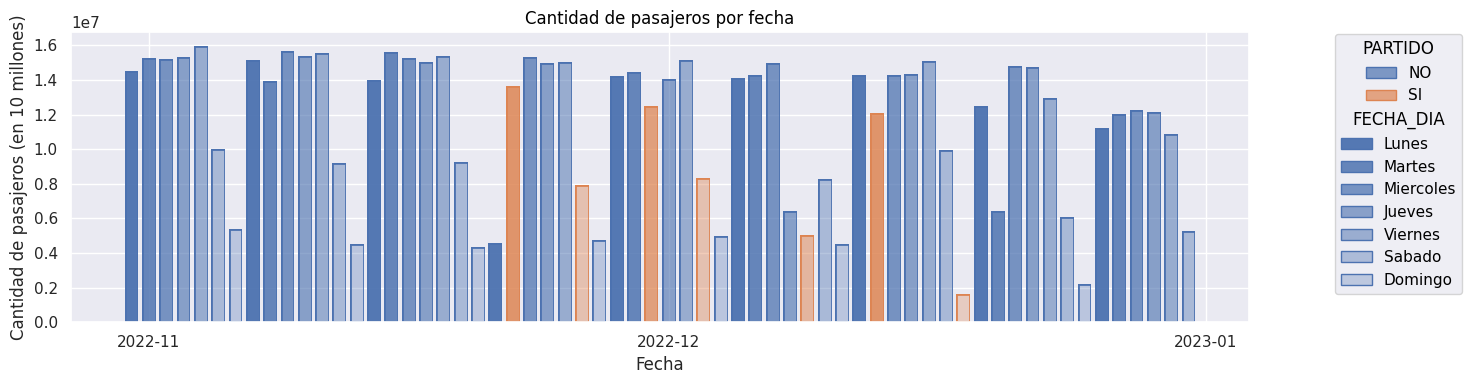

In [295]:
P = (
    so.Plot(data = DFMundial, x = "DIA_TRANSPORTE", y = "CANTIDAD", color = "PARTIDO", alpha="FECHA_DIA")
    .add(so.Bar(), so.Agg("sum"))
    .label(x = "Fecha", y = "Cantidad de pasajeros (en 10 millones)", title = "Cantidad de pasajeros por fecha")
    .layout(size=(15,4), extent = [0, 0, .85, 1])
)
P.show()

De primeras se nota que la fecha con menos movimiento del total es la del último partido, o sea, la final contra Francia. Tambien se ve menos movimiento de lo usual al final de la tabla, en la última semana de Diciembre, causado posiblemente por las fiestas de fin de año.
Para un análisis que pueda darnos más información vamos graficar cada día de la semana por separado.

Lunes


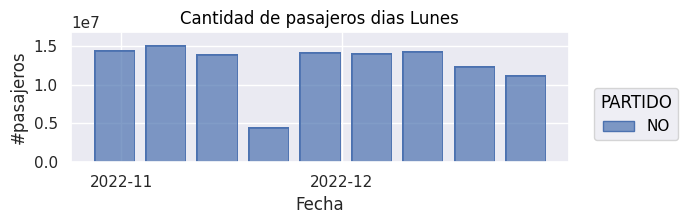

Martes


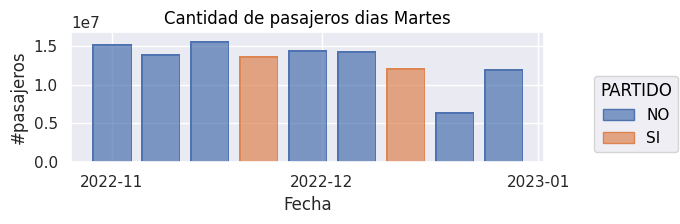

Miercoles


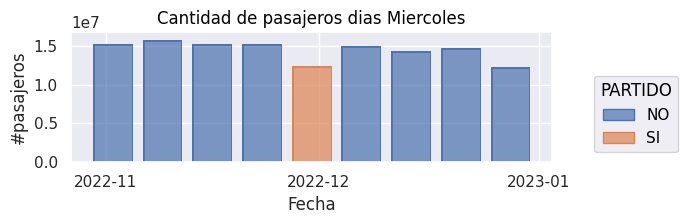

Jueves


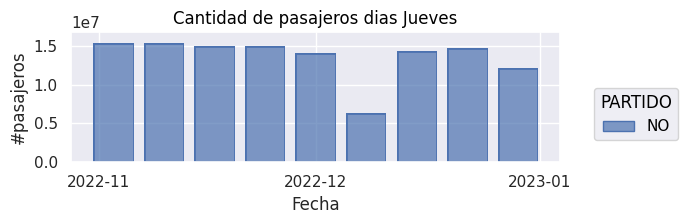

Viernes


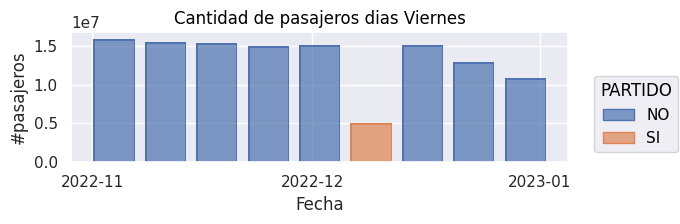

Sabado


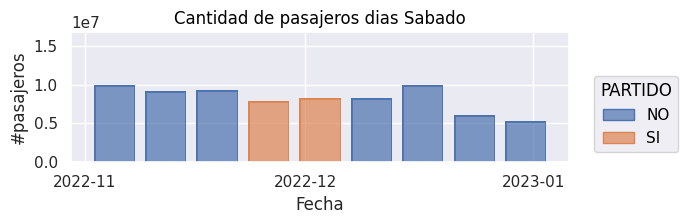

Domingo


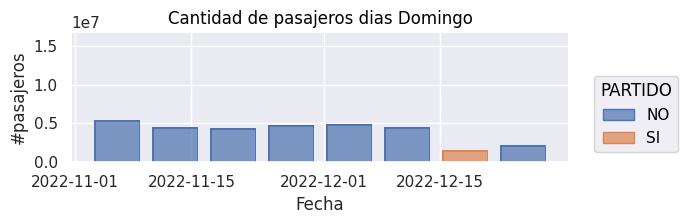

In [250]:
maximo = DFMundial.groupby("DIA_TRANSPORTE").sum()['CANTIDAD'].max()

for dia in list(DFMundial["FECHA_DIA"].unique()):
  Data = DFMundial[DFMundial["FECHA_DIA"] == dia]
  print(dia)
  P = (
    so.Plot(data = Data, x = "DIA_TRANSPORTE", y = "CANTIDAD", color = "PARTIDO")
    .add(so.Bar(), so.Agg("sum"))
    .limit(y=(None,maximo*1.05))
    .label(x = "Fecha", y = "#pasajeros", title = f"Cantidad de pasajeros dias {dia}")
    .layout(size = (7,2),extent = [0, 0, .85, 1.2])
  )
  P.show()

Vemos que, en general, los días de partido tuvieron menos movimiento que los demás. Llaman la atención también algunas otras fechas: hay un lunes y un jueves con valores muy bajos, y un martes y dos sábados con incluso menos movimiento que las fechas de partido. Vamos a graficar esos días por separado y buscar a qué fecha corresponde cada uno, pero antes queremos ver en cuánto cayó el uso del transporte a causa de los partidos.

In [299]:
#Sacamos los lunes y los jueves ya que ningún partido ocurrió en esos días.
SumaCantidad = DFMundial[~DFMundial["FECHA_DIA"].isin(["Lunes", "Jueves"])].groupby(["DIA_TRANSPORTE", "FECHA_DIA"])["CANTIDAD"].sum()
#Calculamos el promedio de la cantidad de gente en el transporte para cada día de la semana que nos interesa.
PromedioCantidad = SumaCantidad.groupby("FECHA_DIA").mean()
display(PromedioCantidad.apply(lambda x: '{:.0f}'.format(x)))

FECHA_DIA
Domingo       4049384
Martes       13097828
Miercoles    14480049
Sabado        8265255
Viernes      13458287
Name: CANTIDAD, dtype: object

In [302]:
SumaPartido = DFMundial.query('PARTIDO == "SI"').groupby(["DIA_TRANSPORTE", "FECHA_DIA"])["CANTIDAD"].sum()
PromedioPartido = SumaPartido.groupby("FECHA_DIA").mean()
display(PromedioPartido.apply(lambda x: '{:.0f}'.format(x))) #Este es el promedio del uso del transporte los días que hubo partido.

FECHA_DIA
Domingo       1622866
Martes       12881264
Miercoles    12474256
Sabado        8130442
Viernes       5033581
Name: CANTIDAD, dtype: object

In [253]:
Dias = ["Domingos", "Martes", "Miercoles", "Sabados", "Viernes"]
for i in range(len(PromedioCantidad)):
  #Con esta fórmula calculamos el porcentaje (en promedio) de caída en el uso del transporte cuando hubo un partido.
  promedio = (100-((PromedioPartido[i]*100)/PromedioCantidad[i]))
  print(f"Los {Dias[i]} con partido, el uso del transporte cayó en un {promedio :.2f}%")

Los Domingos con partido, el uso del transporte cayó en un 59.92%
Los Martes con partido, el uso del transporte cayó en un 1.65%
Los Miercoles con partido, el uso del transporte cayó en un 13.85%
Los Sabados con partido, el uso del transporte cayó en un 1.63%
Los Viernes con partido, el uso del transporte cayó en un 62.60%


Vemos una caida muy alta para todos los días excepto los martes y los sábados. Creemos que esto se debe a esas fechas con mucho menos movimiento de lo usual, las cuales podrían considerarse outliers. Ahora sí revisamos qué pasó esos días.

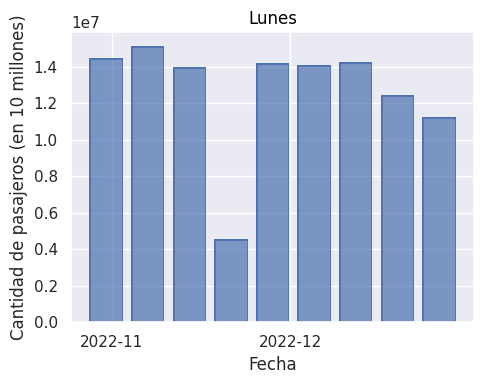

In [307]:
DFLunes = DFMundial[DFMundial["FECHA_DIA"] == "Lunes"]

P = (
    so.Plot(data = DFLunes, x = "DIA_TRANSPORTE", y = "CANTIDAD")
    .add(so.Bar(), so.Agg("sum"))
    .label(x = "Fecha", y = "Cantidad de pasajeros (en 10 millones)", title = "Lunes")
    .layout(size=(5,4))
)
P.show()

In [334]:
#Con esto podemos ver la fecha correspondiente a el día que nos interesa.
print("Cuarto Lunes:", DFLunes["DIA_TRANSPORTE"].unique()[3].strftime("%d-%m-%Y"))

Cuarto Lunes: 21-11-2022


Lunes 21 de Noviembre del 2022 fue feriado por el Día de la Soberanía Nacional, y también feriado con fines turísticos. Eso explica el valor atípico que vemos.

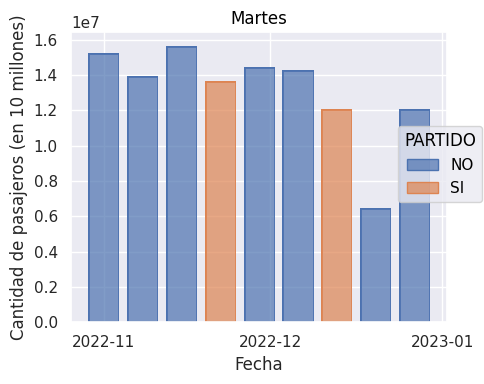

In [308]:
DFMartes = DFMundial[DFMundial["FECHA_DIA"] == "Martes"]

P = (
    so.Plot(data = DFMartes, x = "DIA_TRANSPORTE", y = "CANTIDAD", color = "PARTIDO")
    .add(so.Bar(), so.Agg("sum"))
    .label(x = "Fecha", y = "Cantidad de pasajeros (en 10 millones)", title = "Martes")
    .layout(size=(5,4))
)
P.show()

In [335]:
print('Octavo Martes:', DFMartes["DIA_TRANSPORTE"].unique()[7].strftime("%d-%m-%Y"))

Octavo Martes: 20-12-2022


Martes 20 de Diciembre del 2022 fue el día que la selección argentina volvió al país luego de ganar el mundial, decretado feriado nacional.

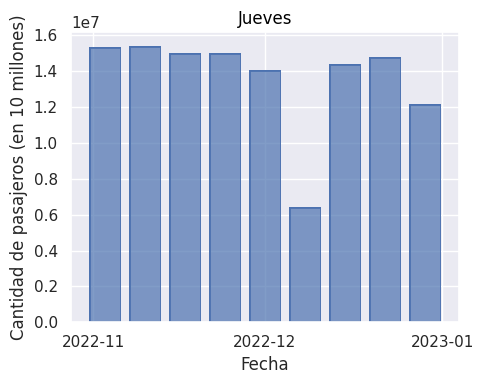

In [314]:
DFJueves = DFMundial[DFMundial["FECHA_DIA"] == "Jueves"]

P = (
    so.Plot(data = DFJueves, x = "DIA_TRANSPORTE", y = "CANTIDAD")
    .add(so.Bar(), so.Agg("sum"))
    .label(x = "Fecha", y = "Cantidad de pasajeros (en 10 millones)", title = "Jueves")
    .layout(size=(5,4))
)
P.show()

In [337]:
print('Sexto Jueves:', DFJueves["DIA_TRANSPORTE"].unique()[5].strftime("%d-%m-%Y"))

Sexto Jueves: 08-12-2022


Jueves 8 de Diciembre del 2022 fue feriado por el día de la Inmaculada Concepción de la Santísima Virgen María.

Entonces podemos concluir
- Primero: El mundial provocó una disminución en el movimiento de la gente los días que hubo partido (y generó el día de menor movimiento del período analizado).
- Segundo: Francia.
- Tercero: Hay varios días que se podrían considerar outliers: un feriado (Lunes 21 de Noviembre), las fiestas, y el 20 de Diciembre que se decretó feriado nacional por el festejo del título obtenido en Qatar.

#### **Analisis Elecciones 2023 - Caso Jujuy**

En primer lugar volvemos a cargar los datos de 2023 y los preparamos para poder usarlos:
cambiamos el tipo de dato de las fechas a Datetime y agregamos el día de la semana.


In [342]:
datos2023 = pd.read_csv("sube-2023.csv") # DataFrame
datos2023["DIA_TRANSPORTE"] = pd.to_datetime(datos2023["DIA_TRANSPORTE"])
datos2023["SEMANA"] = datos2023["DIA_TRANSPORTE"].dt.day_name()

Nos fijamos qué días tuvieron menos movimiento.


In [343]:
DatosAgrupados = datos2023[["DIA_TRANSPORTE", "CANTIDAD"]].groupby("DIA_TRANSPORTE").sum()
DatosAgrupados.sort_values(by="CANTIDAD", ascending = True).head(5)

,CANTIDAD
DIA_TRANSPORTE,
2023-10-22,655564
2023-11-19,684308
2023-08-13,909517
2023-01-01,1766654
2023-12-25,2458796


Podemos ver que entre los primeros 3 y los 2 restantes hay una considerable diferencia

 Que el primero de enero y el 25 de diciembre hayan tenido poco movimiento es esperable, pero ¿Qué ocurrió los otros tres días?

Estos fueron los días donde hubo elecciones. 13/08 las PASO, 22/10 las generales y 19/11 el ballotage.

Nos centramos en estas tres fechas en particular. El transporte público fue gratiuito durante la mayor parte de esos días, lo que explica que haya tan pocos registros.


Según la [página oficial del gobierno](https://www.argentina.gob.ar/noticias/el-transporte-sera-gratuito-en-todo-el-pais-el-proximo-domingo-para-ir-votar
), hubo transporte gratis en la mayoría del país, excepto en algunos lugares. En particular, se especificó en el artículo que Jujuy no se adhirió, por lo que esperamos tener algún comportamiento extraño en esa provincia.


Escribimos los días de elecciones en una lista y armamos una columna en el Dataframe que nos los distinga.


In [344]:
diasElecciones = pd.to_datetime(['10-22-2023','11-19-2023','08-13-2023'])
def elecciones(dia):
  if dia in diasElecciones:
    return "SI"
  else:
    return "NO"
datos2023["DiasElecciones"] = datos2023["DIA_TRANSPORTE"].apply(elecciones)

Agrupamos la cantidad de movimiento por provincia para los días en donde hubo elecciones.


In [345]:
EleccionesProvincias = datos2023[["DIA_TRANSPORTE", "CANTIDAD","PROVINCIA","DiasElecciones"]].groupby(["DIA_TRANSPORTE","PROVINCIA","DiasElecciones"]).sum()
EleccionesProvincias = EleccionesProvincias.query("DiasElecciones == 'SI'" )

In [346]:
#Reacomodamos la tabla para que nos muestre las fechas con sus cantidas por columna
EleccionesProvincias = EleccionesProvincias.reset_index().pivot_table(
    index = "PROVINCIA",
    columns = "DIA_TRANSPORTE",
    values = "CANTIDAD",
)
EleccionesProvincias = EleccionesProvincias.sort_values(by="2023-10-22", ascending=False)
display(EleccionesProvincias)

DIA_TRANSPORTE,2023-08-13,2023-10-22,2023-11-19
PROVINCIA,,,
JN,372633,244387,262429
MENDOZA,179146,155951,134066
JUJUY,97178,100714,109245
BUENOS AIRES,147480,96223,106259
SANTA FE,27344,18353,24873
...,...,...,...
NEUQUÉN,476,309,634
CATAMARCA,645,96,4829
SAN LUIS,66,59,32


Obtenemos que Mendoza resulta tener incluso más registros que Jujuy. Investigando el porqué vimos que en Mendoza el boleto fue gratuito pero, por el sistema que decidieron implementar, los viajes quedaron registrados igualmente.

Igualmente, tomaremos a Jujuy como caso de estudio. Vemos que registra muchísimo más que las demás provincias durante las elecciones. Esto podría deberse también a que los domingos, por algún motivo, Jujuy registre mucho más movimiento que las demás provincias, sin importar si hay elecciones o no. Para ver esto vamos a comparar los domingos de Jujuy con los de otra provincias. Tomamos Buenos Aires como representativo, ya que tiene mucho movimiento.


Armamos un Dataframe con los movimientos de los domingos para analizar.


In [265]:
Domingos = datos2023.query("SEMANA == 'Sunday'")

In [348]:
DomingosPorDia = Domingos[["DIA_TRANSPORTE", "CANTIDAD","DiasElecciones"]].groupby(["DIA_TRANSPORTE","DiasElecciones"]).sum()
DomingosPorProvincia = Domingos[["DIA_TRANSPORTE", "CANTIDAD","PROVINCIA","DiasElecciones"]].groupby(["DIA_TRANSPORTE","PROVINCIA","DiasElecciones"]).sum()

In [267]:
DomingosJujuy = DomingosPorProvincia.query("PROVINCIA == 'JUJUY'") #Movimiento los domingos en Jujuy
DomingosBSAS = DomingosPorProvincia.query("PROVINCIA == 'BUENOS AIRES'") #Movimiento los domingos en Buenos Aires

EleccionesJujuy = EleccionesProvincias.query("PROVINCIA == 'JUJUY'") #Movimiento los días de elecciones en Jujuy
EleccionesBSAS = EleccionesProvincias.query("PROVINCIA == 'BUENOS AIRES'") #Movimiento los días de elecciones en Buenos Aires

In [268]:
CantidadFechas = DomingosPorDia.shape[0] #Contamos la cantidad de domingos para hacer estadíastica

TotalDomingos = DomingosPorDia["CANTIDAD"].sum()  #Cantidad total de viajes los domingos
TotalElecciones = EleccionesProvincias.sum(axis=1).sum() #Cantidad total de viajes los días de elecciones

TotalDomingosJujuy = DomingosJujuy["CANTIDAD"].sum() #Cantidad total de viajes los domingos en Jujuy
TotalDomingosBSAS = DomingosBSAS["CANTIDAD"].sum() #Cantidad total de viajes los domingos en Buenos Aires

TotalEleccionesJujuy = EleccionesJujuy.sum(axis=1).values[0] #Cantidad total de viajes los días de elecciones en Jujuy
TotalEleccionesBSAS = EleccionesBSAS.sum(axis=1).values[0] #Cantidad total de viajes los días de elecciones en Buenos Aires

In [269]:
VisualizacionDatos = pd.DataFrame()

VisualizacionDatos['Domingos'] = {
    'Total':TotalDomingos,
    'Jujuy':TotalDomingosJujuy,
    'Buenos Aires':TotalDomingosBSAS
                                       }
VisualizacionDatos['Elecciones'] = {
    'Total':TotalElecciones,
    'Jujuy':TotalEleccionesJujuy,
    'Buenos Aires':TotalEleccionesBSAS
                                       }
#Armamos un df para visualizar los datos
display(VisualizacionDatos)

,Domingos,Elecciones
Total,244246454,2245296
Jujuy,4204792,307137
Buenos Aires,99152471,349962


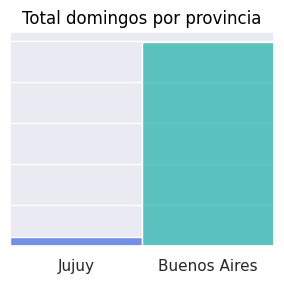

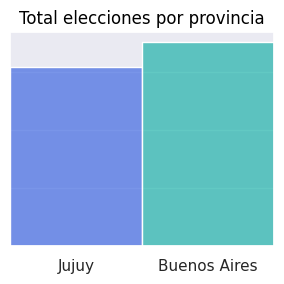

In [270]:
from matplotlib.ticker import FixedFormatter
empty_formatter = FixedFormatter([])

DomingosPlot = (
    so.Plot(x=['Jujuy','Buenos Aires'], y=[TotalDomingosJujuy, TotalDomingosBSAS], color=['Jujuy','Buenos Aires'])
    .add(so.Bars(), legend=False)
    .layout(size=(3,3))
    .scale(color={'Buenos Aires':'lightseagreen', 'Jujuy':'royalblue'}, y=so.Continuous().tick().label(formatter = empty_formatter))
    .label(title='Total domingos por provincia')
)

EleccionesPlot = (
    so.Plot(x=['Jujuy','Buenos Aires'], y=[TotalEleccionesJujuy, TotalEleccionesBSAS], color=['Jujuy','Buenos Aires'])
    .add(so.Bars(), legend=False)
    .layout(size=(3,3))
    .scale(color={'Buenos Aires':'lightseagreen', 'Jujuy':'royalblue'}, y=so.Continuous().tick().label(formatter = empty_formatter))
    .label(title='Total elecciones por provincia')
)
DomingosPlot.show()
print()
EleccionesPlot.show()

A simple vista vemos que Buenos Aires y Jujuy movieron mas o menos la misma cantidad de gente durante las elecciones, pero en general los domingos Buenos Aires mueve mas de 20 veces la gente de Jujuy.

Calculamos las medias


In [271]:
MediaTotalDomingos = round(TotalDomingos/CantidadFechas)
MediaTotalElecciones = round(TotalElecciones/3)

MediaTotalDomingosJujuy = round(TotalDomingosJujuy/CantidadFechas)
MediaTotalDomingosBSAS = round(TotalDomingosBSAS/CantidadFechas)

MediaEleccionesJujuy = round(TotalEleccionesJujuy/3)
MediaEleccionesBSAS = round(TotalEleccionesBSAS/3)

In [272]:
VisualizacionDatos['Media Domingos'] = {
    'Total':MediaTotalDomingos,
    'Jujuy':MediaTotalDomingosJujuy,
    'Buenos Aires':MediaTotalDomingosBSAS
                                       }
VisualizacionDatos['Media Elecciones'] = {
    'Total':MediaTotalElecciones,
    'Jujuy':MediaEleccionesJujuy,
    'Buenos Aires':MediaEleccionesBSAS
                                       }
#Utilizamos el df anterior para visualizar los datos
VisualizacionDatos

,Domingos,Elecciones,Media Domingos,Media Elecciones
Total,244246454,2245296,4608424,748432
Jujuy,4204792,307137,79336,102379
Buenos Aires,99152471,349962,1870801,116654


Vemos proporciones

In [273]:
RelDomingosEleccionesTotal = (MediaTotalElecciones/MediaTotalDomingos) * 100 #Qué porcentaje de los movimientos totales representan las elecciones

RelDomingosDomingosJujuy = (MediaTotalDomingosJujuy/MediaTotalDomingos) * 100 #Qué porcentaje de los movimientos totales representa Jujuy
RelDomingosDomingosBSAS = (MediaTotalDomingosBSAS/MediaTotalDomingos) * 100 #Qué porcentaje de los movimientos totales representa Buenos Aires

RelEleccionesEleccionesJujuy = (MediaEleccionesJujuy/MediaTotalElecciones) * 100 #Qué porcentaje de las elecciones representa Jujuy
RelEleccionesEleccionesBSAS = (MediaEleccionesBSAS/MediaTotalElecciones) * 100 #Qué porcentaje de las elecciones representa Buenos Aires

In [274]:
Participacion_EleccionesTotal = pd.Series([RelDomingosEleccionesTotal,100-RelDomingosEleccionesTotal], index = ["Elecciones","Porcentaje Restante"])
Participacion_ProvinciasTotal = pd.Series([RelDomingosDomingosJujuy,RelDomingosDomingosBSAS,100-RelDomingosDomingosJujuy-RelDomingosDomingosBSAS], index = ["Jujuy", "Buenos Aires","Porcentaje Restante"])
Participacion_Provincias_Elecciones = pd.Series([RelEleccionesEleccionesJujuy,RelEleccionesEleccionesBSAS,100-RelEleccionesEleccionesJujuy-RelEleccionesEleccionesBSAS], index = ["Jujuy", "Buenos Aires", "Porcentaje Restante"])

In [275]:
Participacion_EleccionesTotal = pd.DataFrame(Participacion_EleccionesTotal, columns = ["Participación"])
Participacion_ProvinciasTotal = pd.DataFrame(Participacion_ProvinciasTotal, columns = ["Participación"])
Participacion_Provincias_Elecciones = pd.DataFrame(Participacion_Provincias_Elecciones, columns = ["Participación"])

In [276]:
Participacion_EleccionesTotal["Categoria"] = Participacion_EleccionesTotal.index
Participacion_EleccionesTotal["Total"] = ""
Participacion_ProvinciasTotal["Categoria"] = Participacion_ProvinciasTotal.index
Participacion_ProvinciasTotal["Total"] = ""
Participacion_Provincias_Elecciones["Categoria"] = Participacion_Provincias_Elecciones.index
Participacion_Provincias_Elecciones["Total"] = ""

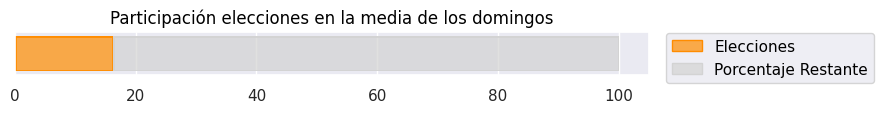

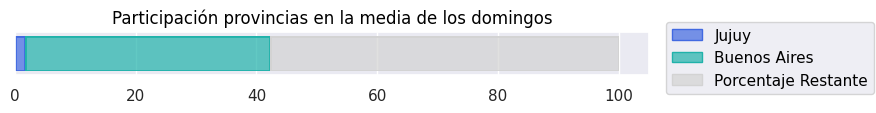

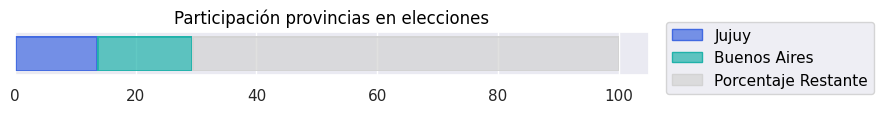

In [350]:
Graf1 = (so.Plot(Participacion_EleccionesTotal, x = "Participación", y = "Total", color="Categoria").add(so.Bar(),so.Stack())
         .layout(size=(9,1),extent = [0, 0, .75, 1.3])
         .label(x="", y="", color="",title = "Participación elecciones en la media de los domingos")
         .scale(color={'Porcentaje Restante':'lightgray','Elecciones':'darkorange'}))
Graf2 = (so.Plot(Participacion_ProvinciasTotal, x = "Participación", y = "Total", color="Categoria").add(so.Bar(),so.Stack())
        .layout(size=(9,1),extent = [0, 0, .75, 1.3])
        .label(x="", y="", color="",title = "Participación provincias en la media de los domingos")
        .scale(color={'Porcentaje Restante':'lightgray','Buenos Aires':'lightseagreen', 'Jujuy':'royalblue'})
        )
Graf3 = (so.Plot(Participacion_Provincias_Elecciones, x = "Participación", y = "Total", color="Categoria").add(so.Bar(),so.Stack())
        .layout(size=(9,1),extent = [0, 0, .75, 1.3])
        .label(x="", y="", color="",title = "Participación provincias en elecciones")
        .scale(color={'Porcentaje Restante':'lightgray','Buenos Aires':'lightseagreen', 'Jujuy':'royalblue'})
        )
Graf1.show()
Graf2.show()
Graf3.show()

In [279]:
print(f'Relación Domingos - Elecciones_Total = {round(RelDomingosEleccionesTotal,2)}%')
print(f'Relación Domingos - DomingosJujuy = {round(RelDomingosDomingosJujuy, 2)}%')
print(f'Relación Domingos - DomingosBSAS = {round(RelDomingosDomingosBSAS, 2)}%' )
print(f'Relación Elecciones - EleccionesJujuy = {round(RelEleccionesEleccionesJujuy, 2)}%')
print(f'Relación Elecciones - EleccionesBSAS = {round(RelEleccionesEleccionesBSAS, 2)}%')

Relación Domingos - Elecciones_Total = 16.24%
Relación Domingos - DomingosJujuy = 1.72%
Relación Domingos - DomingosBSAS = 40.6%
Relación Elecciones - EleccionesJujuy = 13.68%
Relación Elecciones - EleccionesBSAS = 15.59%


Primero observamos que durante las elecciones hubo solo un 16% de los registros que se acostumbra los domingos en general. Esto se explica con la medida del gobierno de hacer la mayoría de los transportes gratuitos (por lo que no se se registran los viajes).

Vemos también que los domingos los viajes realizados en Buenos Aires representan un 40% de los viajes totales en todo el país, mientras que los de Jujuy no llegan al 2%.

Sin embargo, durante las elecciones Buenos Aires y Jujuy tuvieron una participación similar, de alrededor del 15% del total. Esto también se condice con el hecho de que Jujuy no se haya adherido a la medida, y los viajes registrados de Buenos Aires deberían ser aquellos registrados fuera del horario electoral.

De esta manera, como los registros de Buenos Aires disminuyeron significativamente, los de Jujuy pasaron a ser comparables con ellos, dandole así un peso mucho mayor de lo usual a Jujuy.

Por último, graficamos los movimientos de Buenos Aires y Jujuy a los largo de todos los domingos, para comparar su comportamiento durante las elecciones.

In [280]:
#Armamos un DF con los domingos de Jujuy y BSAS
DomingosGrafico = Domingos.query("PROVINCIA == 'BUENOS AIRES' or PROVINCIA == 'JUJUY'").sort_values("PROVINCIA", ascending = True)

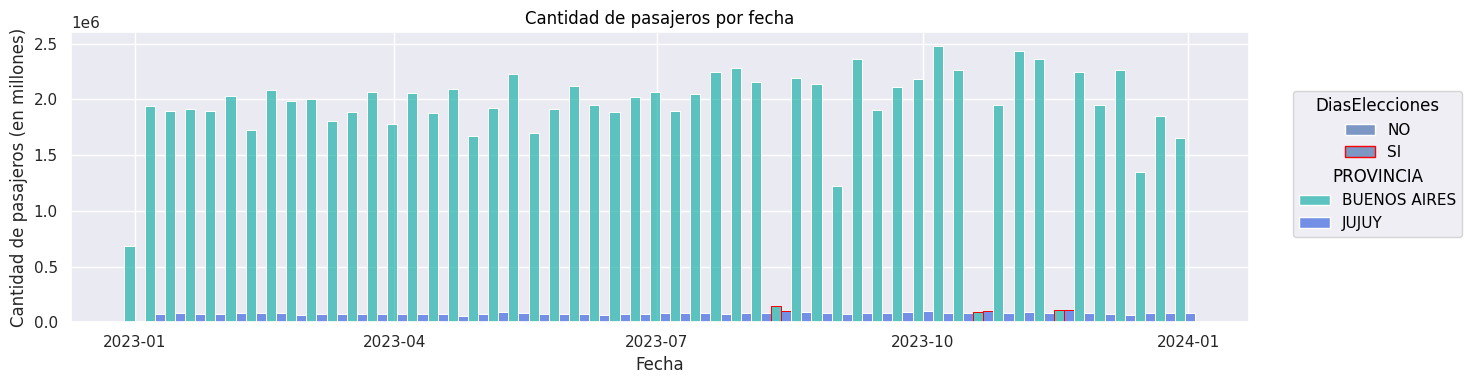

In [281]:
P = (
    so.Plot(data = DomingosGrafico, x = "DIA_TRANSPORTE", y = "CANTIDAD", edgecolor ="DiasElecciones", color = "PROVINCIA")
    .add(so.Bars(width=1.0), so.Agg("sum"), so.Dodge(empty="fill"))
    .layout(size=(15,4), extent = [0, 0, .85, 1])
    .scale(color={'BUENOS AIRES':'lightseagreen', 'JUJUY':'royalblue'}, edgecolor={'SI':'red', 'NO':'white'})
    .label(x = "Fecha", y = "Cantidad de pasajeros (en millones)", title = "Cantidad de pasajeros por fecha")
)

P.show()


Y como esperabamos, podemos ver claramente que en los días de elecciones el movimiento de Buenos Aires disminuyó considerablemente, mientras que en Jujuy se mantuvo relativamente constante. Además, aunque en Jujuy el movimiento es mucho menor que en Buenos Aires, durante las elecciones fue similar.


# **Modelado**

### **Ejercicio 5. Modelo de regresión. En este ítem, intentaremos ajustar la cantidad de pasajeros que viajan por día en una línea de colectivos utilizando la información de pasajeros por día de otras líneas. Para esto, utilizaremos el dataset sube-2023-regresion.csv**

#### **(a) Generar un DataFrame en el que las columnas sean las líneas de colectivo (TIPO_TRANSPORTE == "COLECTIVO") de AMBA de jurisdicción nacional (PROVINCIA == "JN") y las obser- vaciones sean los días del año. Es decir, cada fila del DataFrame corresponde a un día del año, y en esa fila deben figurar la cantidad de pasajeros que viajaron en cada línea de colectivo en el día correspondiente.**

In [282]:
datos_AMBA = pd.read_csv('sube-2023-regresion.csv')
datos_AMBA = datos_AMBA.query('AMBA == "SI" and TIPO_TRANSPORTE == "COLECTIVO"')
datos_ColectivoJN = datos_AMBA[datos_AMBA['PROVINCIA'] == 'JN']
cols = datos_ColectivoJN["LINEA"].unique() # Los nombres de las lineas de colectivo
pasajeros_por_linea = pd.DataFrame ()
for col in cols:
  datos_linea = datos_ColectivoJN[datos_ColectivoJN.LINEA == col][["DIA_TRANSPORTE", "CANTIDAD"]]
  datos_linea = datos_linea.set_index("DIA_TRANSPORTE").rename( columns = {"CANTIDAD" : col })
  pasajeros_por_linea = pd.concat ([pasajeros_por_linea , datos_linea], axis = 1)



#### **(b) Eliminar las columnas correspondientes a líneas de colectivo que tengan datos faltantes.**

In [283]:
#Hay como 7 u 8 lineas con solo 1 Nan, decidimos borrarlas pero podriamos haber aproximado ese valor con los datos no faltantes
Lineas_Nan_Count = pasajeros_por_linea.isnull().sum().sort_values()
pasajeros_por_linea_limpio = pasajeros_por_linea.dropna(axis=1)
pasajeros_por_linea_limpio = pasajeros_por_linea_limpio.rename(columns={'BS_ASLINEA_123':'BSAS_LINEA_123'})
pasajeros_por_linea_limpio.columns = pasajeros_por_linea_limpio.columns.str.replace(' ', '_')
pasajeros_por_linea_limpio.head()

,BSAS_LINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,BSAS_LINEA_024,BSAS_LINEA_026,BSAS_LINEA_029,BSAS_LINEA_032,BSAS_LINEA_034,BSAS_LINEA_037,BSAS_LINEA_039,BSAS_LINEA_041,BSAS_LINEA_045,BSAS_LINEA_046,BSAS_LINEA_047,BSAS_LINEA_049,BSAS_LINEA_051,BSAS_LINEA_053,BSAS_LINEA_055,BSAS_LINEA_056,BSAS_LINEA_057,BSAS_LINEA_059,BSAS_LINEA_060,BSAS_LINEA_061,BSAS_LINEA_062,BSAS_LINEA_063,BSAS_LINEA_064,BSAS_LINEA_067,BSAS_LINEA_068,BSAS_LINEA_070,BSAS_LINEA_071,BSAS_LINEA_074,BSAS_LINEA_075,BSAS_LINEA_078,BSAS_LINEA_079,BSAS_LINEA_080,BSAS_LINEA_084,BSAS_LINEA_085,BSAS_LINEA_086,BSAS_LINEA_087,BSAS_LINEA_088,BSAS_LINEA_091,BSAS_LINEA_092,BSAS_LINEA_093,BSAS_LINEA_095,BSAS_LINEA_096,BSAS_LINEA_097,BSAS_LINEA_098,BSAS_LINEA_100,BSAS_LINEA_102,BSAS_LINEA_103,BSAS_LINEA_105,BSAS_LINEA_106,BSAS_LINEA_108,BSAS_LINEA_109,BSAS_LINEA_110,BSAS_LINEA_111,BSAS_LINEA_113,BSAS_LINEA_115,BSAS_LINEA_117,BSAS_LINEA_118,BSAS_LINEA_124,BSAS_LINEA_126,BSAS_LINEA_127,BSAS_LINEA_128,BSAS_LINEA_130,BSAS_LINEA_132,BSAS_LINEA_133,BSAS_LINEA_134,BSAS_LINEA_135,BSAS_LINEA_136,BSAS_LINEA_140,BSAS_LINEA_143,BSAS_LINEA_146,BSAS_LINEA_150,BSAS_LINEA_152,BSAS_LINEA_153,BSAS_LINEA_154,BSAS_LINEA_158,BSAS_LINEA_159,BSAS_LINEA_160,BSAS_LINEA_161,BSAS_LINEA_163,BSAS_LINEA_166,BSAS_LINEA_168,BSAS_LINEA_169,BSAS_LINEA_172,BSAS_LINEA_174,BSAS_LINEA_176,BSAS_LINEA_177,BSAS_LINEA_178,BSAS_LINEA_179,BSAS_LINEA_180,BSAS_LINEA_181,BSAS_LINEA_182,BSAS_LINEA_185,BSAS_LINEA_188,BSAS_LINEA_193,BSAS_LINEA_25,BSAS_LINEA_31,LINEA_1,LINEA_101,LINEA_107,LINEA_12,LINEA_184,LINEA_23,LINEA_28,LINEA_33,LINEA_4,LINEA_42,LINEA_44,LINEA_50,LINEA_6,LINEA_7,LINEA_76,LINEA_8,LINEA_099,LINEA_164_AMBA
DIA_TRANSPORTE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,7599,5399,4854,1280,8488,8705,8866,6496,6517,4223,2859,1506,4595,7853,4477,2059,8139,12243,17260,598,910,4566,4379,5229,8818,5139,7397,728,778,3474,3518,6392,3577,7958,875,2955,3643,5445,8494,2151,3036,2630,1672,9734,5677,3185,3742,6318,4921,1972,3676,4968,3270,3788,2951,5956,4741,2718,7052,3259,2862,4780,9691,2923,4371,3822,2416,2816,2249,4546,4033,14533,1535,468,2226,9450,10850,4989,1075,4734,3801,3542,1726,2486,6845,3610,5687,2071,11345,3433,5061,377,3535,418,1113,7013,1788,6080,4775,9757,1146,1033,10334,8076,2942,4029,4649,4839,2449,2184,3797,5317,1882,3210
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,30397,19374,22673,9871,34304,30555,32876,27221,25514,17840,17010,9624,21816,37933,21677,12883,40993,48841,77768,6734,8295,22064,19653,24982,31462,17342,31498,7487,6533,22483,15555,30742,14379,34516,13399,18622,19192,23731,33474,12539,15188,34836,9757,45863,24726,16485,18192,22322,26317,13084,17211,23124,16264,25416,16797,24866,18452,17133,26766,16013,15408,29406,38528,18469,20254,22613,17033,16212,13392,21632,16375,52104,7954,3392,12302,50798,36501,34973,7571,24843,29578,22357,13336,17519,52213,17864,33676,9340,48916,16950,28994,7380,20269,4161,12894,31895,10278,30405,22222,36380,9583,8136,62934,33017,15329,19072,20387,16221,10486,12774,17374,23250,10322,19362
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,33567,21889,27184,10604,38860,34761,38952,29849,27563,19420,19460,11324,24544,42345,25006,14566,44033,56781,87614,7606,7998,25218,20760,28400,35225,19215,34237,8530,7254,25031,18629,35363,16422,39769,15036,20903,20443,27284,37804,14505,16977,39931,11269,51836,27757,18695,20533,25169,30053,16166,20004,26636,17710,29415,17558,28032,19931,20422,30547,18264,18320,34393,41682,21276,22957,25607,17931,18724,14806,23753,17898,59989,8433,4032,13686,57708,41741,39594,8262,27651,33352,24428,15458,20715,57613,20801,37365,10967,54395,19244,33579,8570,21779,5695,14991,35523,11524,32545,25549,42120,11518,9507,72260,35216,17836,21609,23595,18448,12193,13949,19860,26294,119

#### **(c) Se quiere ajustar la cantidad de pasajeros en la línea BSAS_LINEA_009 en función de los pasajeros en otras líneas. Proponer tres modelos de regresión distintos. En cada modelo, pueden utilizarse la información solo de otras 5 líneas de colectivos (pueden ser distintas líneas de colectivo en los distintos modelos). Los criterios de selección de esas 5 columnas los determinan ustedes, y deben estar explicitados en el informe.**

Para ajustar la cantidad de pasajeros en la linea BSAS_LINEA_009 proponemos los siguientes 3 modelos:
- Lineas elegidas al azar para tener uno con el cual comparar
- Las lineas que maximicen la correlacion lineal directa (Matriz de correlacion)
- Lineas que sean cercanas o inteseccionen con la linea 009

In [284]:
Correlacion_Lineas = pasajeros_por_linea_limpio.corr()['BSAS_LINEA_009'].sort_values(ascending=False)
display(Correlacion_Lineas)

BSAS_LINEA_009    1.000000
LINEA_101         0.976802
BSAS_LINEA_146    0.975382
LINEA_7           0.974210
BSAS_LINEA_024    0.973111
                    ...   
BSAS_LINEA_032    0.858388
BSAS_LINEA_153    0.840357
BSAS_LINEA_075    0.810231
BSAS_LINEA_158    0.804953
BSAS_LINEA_193    0.744197
Name: BSAS_LINEA_009, Length: 124, dtype: float64

Como podemos ver, la correlacion entre la linea 9 y las demas es bastante alta, teniendo varias lineas por arriba de 0.95, por tanto elegir "el mejor modelo" es una tarea complicada, ya que probablemente los R cuadrado nos den del orden de 0.9

In [285]:
X = pasajeros_por_linea_limpio.drop('BSAS_LINEA_009', axis=1)
y = pasajeros_por_linea_limpio['BSAS_LINEA_009']


In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=34)

Para analizar los modelos vamos a utilizar las siguientes funciones, que dado un modelo, calculan el R-cuadrado y el Error cuadratico medio de los casos de conjunto de entrenamiento y del de testeo

In [287]:
#Funcion para generar formula lineal
def generadorFormula(L):
    res = ''
    for elem in L:
        res += str(elem) + ' + '
    res = "~ -1 +" + res[:-3] #Si no agrego el -1, me da un intercept enorme y no mejora mucho los parametros de bondad
    return res

#Calcular error cuadratico medio y R2
def bondadAjuste(y_real, y_pred):
    R2 = r2_score(y_real, y_pred)
    ECM = mean_squared_error(y_real, y_pred)
    print(f'R2: {R2 :.4f} \nECM: {ECM :.0f}')

def AnalisisRL(Lineas, X_train, y_train, X_test, y_test):
    formula     = generadorFormula(Lineas)
    X_model     = model_matrix(formula, data=X_train)
    modelo      = LinearRegression(fit_intercept=False)
    modelo.fit(X_model, y_train)
    y_pred_train= modelo.predict(X_model)
    y_pred_test = modelo.predict(model_matrix(formula, data=X_test))
    print('Entrenamiento:')
    bondadAjuste(y_train, y_pred_train)
    print('\nTest:')
    bondadAjuste(y_test, y_pred_test)
    return modelo


In [288]:
#Tomo 5 lineas al azar y analizo el modelo
Lineas = list(X.columns.unique())
Lineas_Al_Azar = ['BSAS_LINEA_017', 'LINEA_33', 'BSAS_LINEA_061', 'BSAS_LINEA_105', 'BSAS_LINEA_046']

Entrenamiento:
R2: 0.9439 
ECM: 7209315

Test:
R2: 0.8439 
ECM: 13824552


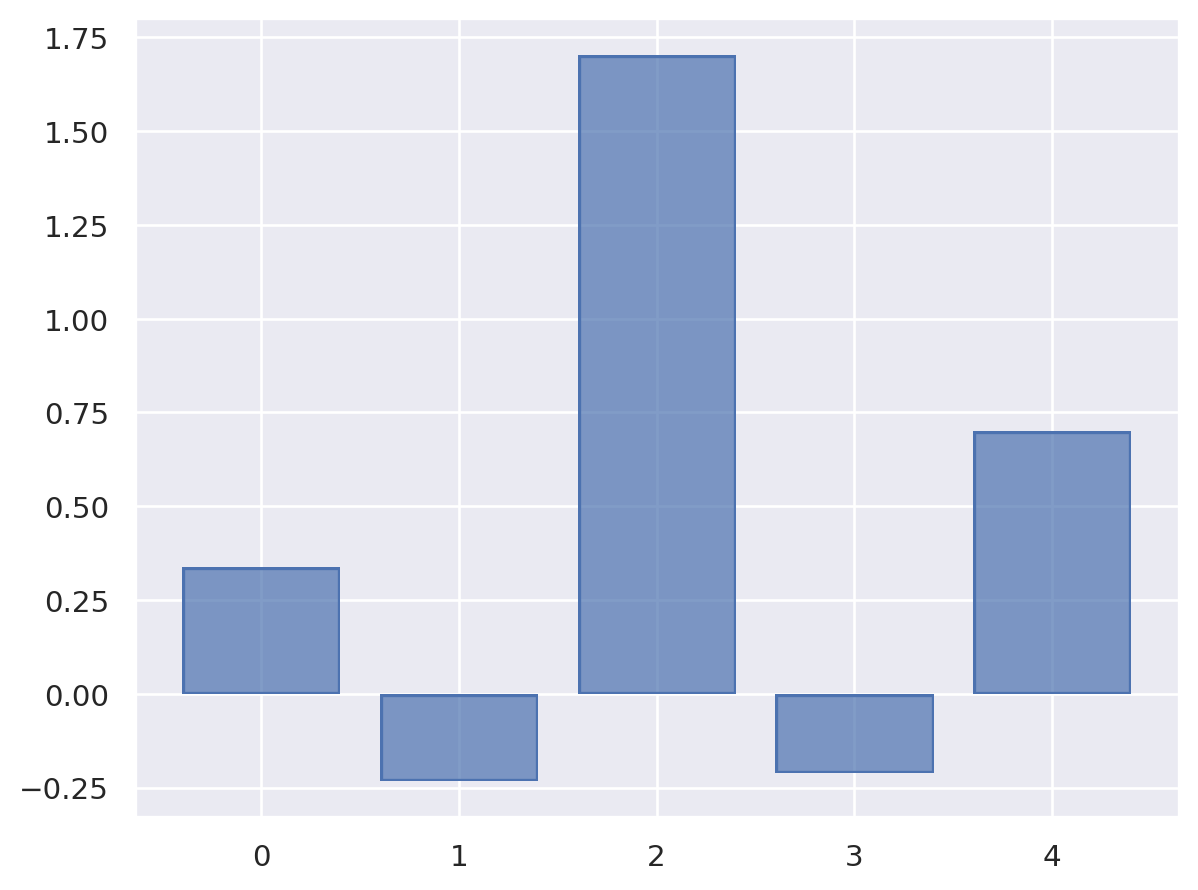

In [289]:
modelo_Al_Azar = AnalisisRL(Lineas_Al_Azar, X_train, y_train, X_test, y_test)
so.Plot(x = np.arange(len(modelo_Al_Azar.coef_)), y = modelo_Al_Azar.coef_).add(so.Bar())

Entrenamiento:
R2: 0.9800 
ECM: 2567728

Test:
R2: 0.9519 
ECM: 4261888


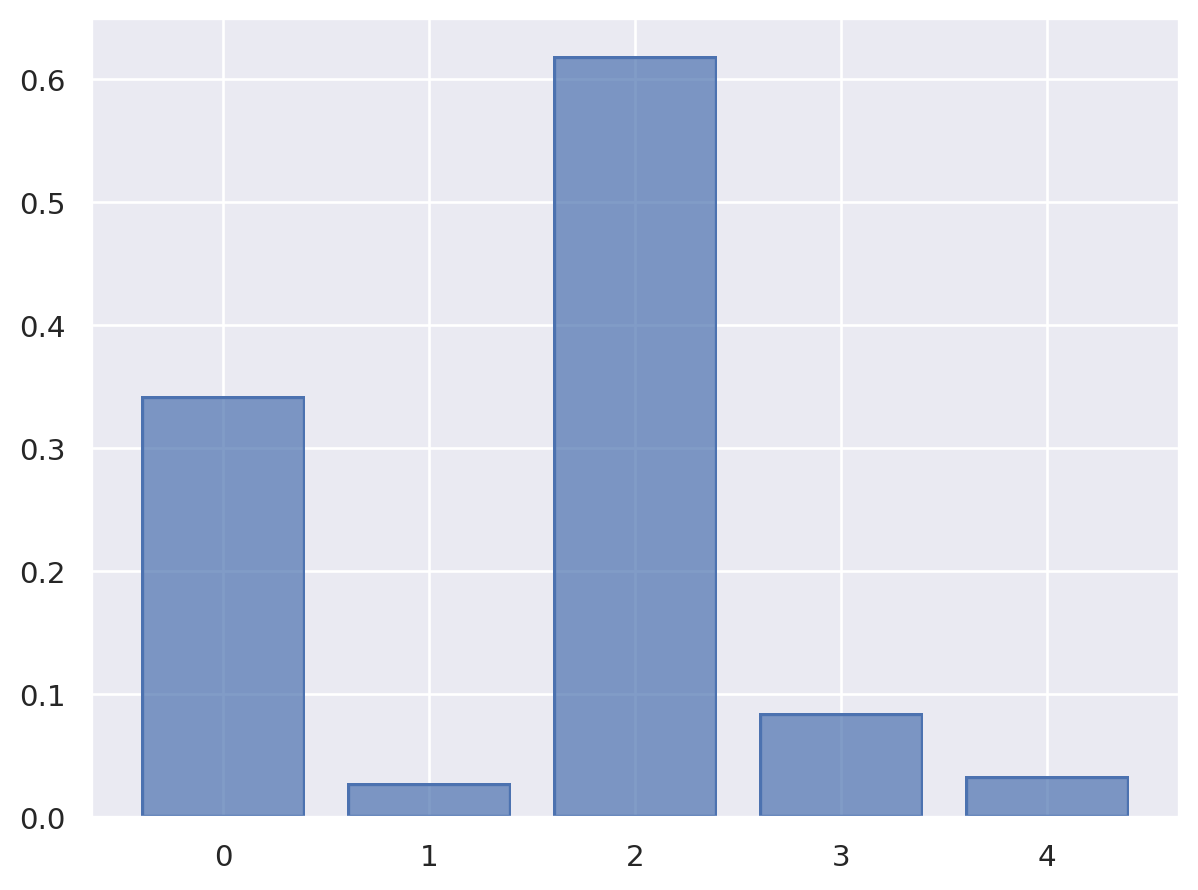

In [290]:
# Tomo las 5 lineas con mayor correlacion
Correlacion_Lineas = pasajeros_por_linea_limpio.corr()['BSAS_LINEA_009'].sort_values(ascending=False)
Lineas_Mayor_corr = list(Correlacion_Lineas[1:6].index)
Modelo_Mayor_corr = AnalisisRL(Lineas_Mayor_corr, X_train, y_train, X_test, y_test)
so.Plot(x = np.arange(len(Modelo_Mayor_corr.coef_)), y = Modelo_Mayor_corr.coef_).add(so.Bar())

Entrenamiento:
R2: 0.9717 
ECM: 3634105

Test:
R2: 0.9171 
ECM: 7338840


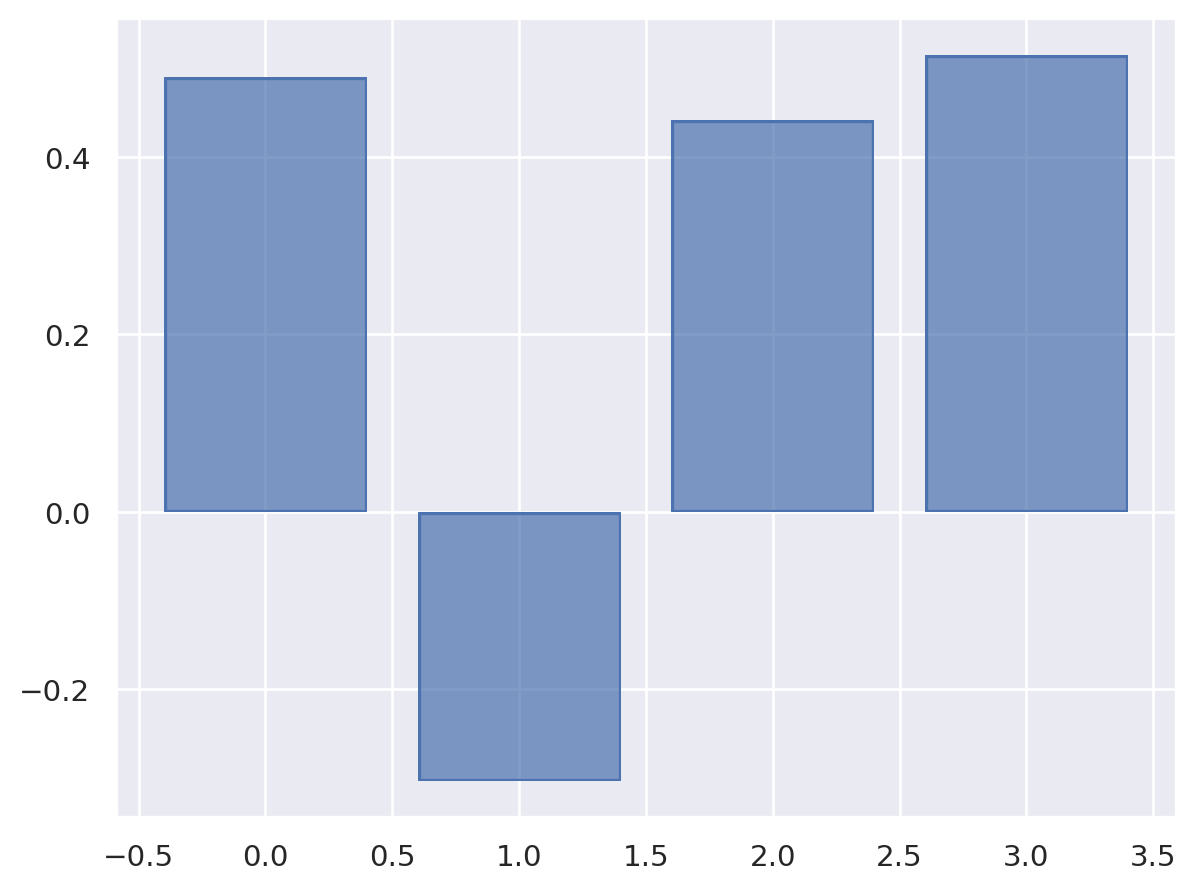

In [291]:
#Lineas cercanas 158, 188, 25, 91
Lineas_Cercanas_inicio = ['158', '188', '25', '91']
Lineas_Cercanas_Columnas = [cadena for cadena in Lineas if any(sec in cadena for sec in Lineas_Cercanas_inicio)]
Modelo_Cercanas = AnalisisRL(Lineas_Cercanas_Columnas, X_train, y_train, X_test, y_test)
so.Plot(x = np.arange(len(Modelo_Cercanas.coef_)), y = Modelo_Cercanas.coef_).add(so.Bar())


#### **(d) Si alguno de los modelos es Regresión Ridge, determinar mediante un esquema de validación el hiperparámetro α.**

En ninguno de los 3 modelos utilizamos el metodo de regresion Ridge ya que todos los valores de los coeficiente eran razonables y no observamos cancelacion catastrafoca por lo que creemos que el metodo ridge no mejoraria mucho el modelo

In [292]:
formula = generadorFormula(Lineas_Cercanas_Columnas)
Modelo_Con_Ridge = model_matrix(formula, data=X_train)
alphas = np.logspace(-3, 4, 30)
mejor_alpha = 0
minimo_ECM_test = 10**10
for alpha in alphas:
    RegresionRidge = Ridge(alpha=alpha)
    X_model     = model_matrix(formula, data=X_train)
    RegresionRidge.fit(X_model, y_train)
    y_pred_train= RegresionRidge.predict(X_model)
    y_pred_test = RegresionRidge.predict(model_matrix(formula, data=X_test))
    ECM_train = mean_squared_error(y_train, y_pred_train)
    ECM_test = mean_squared_error(y_test, y_pred_test)
    if minimo_ECM_test > ECM_test:
        minimo_ECM_test = ECM_test
        mejor_alpha = alpha

print(mejor_alpha)
print(minimo_ECM_test)

10000.0
7021811.031730942


Como podemos ver el ECM utilizando Ridge, con el mejor alpha en terminos de ECM del test, es del orden de 7000000, mientras que el metodo de regresion lineal, con las mismas lineas de colectivo, nos da un ECM del orden de 7300000, sin la nececidad de utilizar un parametro extra.

#### **(e) Proponer un esquema de validación de los modelos y utilizarlo para seleccionar el mejor de los tres modelos propuestos.**

En cada modelo utilizamos el R-cuadrado y el ECM para analizar la bondad de cada uno. Como podemos ver el que maximiza el R-cuadrado y minimiza el ECM es en el que tomamos las lineas de mayor correlacion.


In [293]:
print('Lineas con mayor correlacion')
AnalisisRL(Lineas_Mayor_corr, X_train, y_train, X_test, y_test)

print("\n\nLineas cercanas a la 009")
AnalisisRL(Lineas_Cercanas_Columnas, X_train, y_train, X_test, y_test)

print("\n\nLineas elegidas al azar")
AnalisisRL(Lineas_Al_Azar, X_train, y_train, X_test, y_test)

Lineas con mayor correlacion
Entrenamiento:
R2: 0.9800 
ECM: 2567728

Test:
R2: 0.9519 
ECM: 4261888


Lineas cercanas a la 009
Entrenamiento:
R2: 0.9717 
ECM: 3634105

Test:
R2: 0.9171 
ECM: 7338840


Lineas elegidas al azar
Entrenamiento:
R2: 0.9439 
ECM: 7209315

Test:
R2: 0.8439 
ECM: 13824552


LinearRegression(fit_intercept=False)

#### **(f) Para el modelo elegido, indicar la fórmula final de modelo.**

Formula del modelo de mayor correlacion:
$$ L_{9} = 0.34L_{101} + 0.02L_{146} + 0.61L_{7} + 0.08L_{24} + 0.03L_{107}$$